# PRIMERA PARTE

In [274]:

# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

url="https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allrep.data"
url2 ="https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allrep.test"
data1 = pd.read_csv(url, header=None, na_values="?")  #2800 registros
data2 = pd.read_csv(url2, header=None, na_values="?") #972 registros
data = pd.concat([data1,data2])

#Ponemos nombre a las columnas 
data.columns = ['age', 'sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant',
              'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary',
               'psych', 'TSH measured','TSH','T3 measured','T3','TT4 measured','TT4','T4U measured','T4U','FTI measured',
               'FTI','TBG measured','TBG','referral source','Diagnostico']

#En esta parte elimino los numeros de la columna de diagnostico 
data['Diagnostico'] = list(map(lambda x:x.split('.')[0],data['Diagnostico']))
data


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Diagnostico
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,replacement therapy
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
968,68.0,F,f,f,f,f,f,f,f,f,...,t,124.0,t,1.08,t,114.0,f,NaN,SVI,negative
969,74.0,F,f,f,f,f,f,f,f,f,...,t,112.0,t,1.07,t,105.0,f,NaN,other,negative
970,72.0,M,f,f,f,f,f,f,f,f,...,t,82.0,t,0.94,t,87.0,f,NaN,SVI,negative


In [275]:
#número de registros y atributos
shape = data.shape
shape

(3772, 30)

In [276]:
#tipo de datos
data. dtypes

age                          float64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
TT4 measured                  object
TT4                          float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
TBG measured                  object
T

In [277]:
#Medidas de centralidad y desviación para atributos numéricos:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3771.000000,3403.000000,3003.000000,3541.000000,3385.000000,3387.000000,0.0
mean,51.735879,5.086766,2.013500,108.319345,0.995000,110.469649,NaN
std,20.084958,24.521470,0.827434,35.604248,0.195457,33.089698,NaN
min,1.000000,0.005000,0.050000,2.000000,0.250000,2.000000,NaN
25%,36.000000,0.500000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.000000,1.400000,2.000000,103.000000,0.980000,107.000000,NaN
75%,67.000000,2.700000,2.400000,124.000000,1.080000,124.000000,NaN
max,455.000000,530.000000,10.600000,430.000000,2.320000,395.000000,NaN


In [278]:
# Media de cada uno con respecto al resultado del diagnostico
grouped_data = data.groupby('Diagnostico')
grouped_data.corr()

age       TSH        T3       TT4       T4U  \
Diagnostico                                                                 
negative            age  1.000000 -0.058445 -0.240146 -0.045110 -0.170328   
                    TSH -0.058445  1.000000 -0.158144 -0.273384  0.073027   
                    T3  -0.240146 -0.158144  1.000000  0.568362  0.456616   
                    TT4 -0.045110 -0.273384  0.568362  1.000000  0.450272   
                    T4U -0.170328  0.073027  0.456616  0.450272  1.000000   
                    FTI  0.053675 -0.312100  0.351254  0.778552 -0.180456   
                    TBG       NaN       NaN       NaN       NaN       NaN   
overreplacement     age  1.000000 -0.197793 -0.066188  0.014419 -0.098411   
                    TSH -0.197793  1.000000 -0.179927 -0.055828  0.008999   
                    T3  -0.066188 -0.179927  1.000000  0.784090  0.597297   
                    TT4  0.014419 -0.055828  0.784090  1.000000  0.682650   
                    T4U -0.098411  0.008999  0.597297  0.682650  1.000000   
                    FTI  0.122442 -0.072287  0.447997  0.679834 -0.059104   
                    TBG       NaN       NaN       NaN       NaN       NaN   
replacement therapy age  1.000000  0.213562 -0.542864 -0.046556 -0.017687   
                    TSH  0.213562  1.000000 -0.215132  0.121743  0.230955   
                    T3  -0.542864 -0.215132  1.000000 -0.115739  0.178776   
                    TT4 -0.046556  0.121743 -0.115739  1.000000  0.852312   
                    T4U -0.017687  0.230955  0.178776  0.852312  1.000000   
                    FTI -0.113572  0.030316 -0.394392  0.543726  0.032582   
                    TBG       NaN       NaN       NaN       NaN       NaN   
underreplacement    age  1.000000 -0.193878 -0.184988 -0.130661  0.029227   
                    TSH -0.193878  1.000000 -0.307512 -0.270519  0.001440   
                    T3  -0.184988 -0.307512  1.000000  0.455201  0.626410   
                    TT4 -0.130661 -0.270519  0.455201  1.000000  0.596971   
                    T4U  0.029227  0.001440  0.626410  0.596971  1.000000   
                    FTI -0.126037 -0.339716 -0.128413  0.704174 -0.142649   
                    TBG       NaN       NaN       NaN       NaN       NaN   

                              FTI  TBG  
Diagnostico                             
negative            age  0.053675  NaN  
                    TSH -0.312100  NaN  
                    T3   0.351254  NaN  
                    TT4  0.778552  NaN  
                    T4U -0.180456  NaN  
                    FTI  1.000000  NaN  
                    TBG       NaN  NaN  
overreplacement     age  0.122442  NaN  
                    TSH -0.072287  NaN  
                    T3   0.447997  NaN  
                    TT4  0.679834  NaN  
                    T4U -0.059104  NaN  
                    FTI  1.000000  NaN  
                    TBG       NaN  NaN  
replacement therapy age -0.113572  NaN  
                    TSH  0.030316  NaN  
                    T3  -0.394392  NaN  
                    TT4  0.543726  NaN  
                    T4U  0.032582  NaN  
                    FTI  1.000000  NaN  
                    TBG       NaN  NaN  
underreplacement    age -0.126037  NaN  
                    TSH -0.339716  NaN  
                    T3  -0.128413  NaN  
                    TT4  0.704174  NaN  
                    T4U -0.142649  NaN  
                    FTI  1.000000  NaN  
                    TBG       NaN  NaN

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


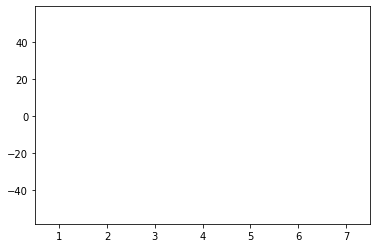

In [279]:
#Diagrama de cajas y bigotes para atributos numéricos

plt.boxplot((data['age'],data['TSH'],data['T3'],data['TT4'],data['T4U'], data['FTI'], data['TBG']))
plt.show()

In [280]:
#Medidas de centralidad para atributos categóricos:
data.mode()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Diagnostico
0,59.0,F,f,f,f,f,f,f,f,f,...,t,101.0,t,0.99,t,100.0,f,NaN,other,negative


In [281]:
#matriz de correlación
data.corr()

,age,TSH,T3,TT4,T4U,FTI,TBG
age,1.000000,-0.059087,-0.238412,-0.038841,-0.166250,0.052788,NaN
TSH,-0.059087,1.000000,-0.161823,-0.267365,0.073391,-0.304684,NaN
T3,-0.238412,-0.161823,1.000000,0.559503,0.454127,0.348921,NaN
TT4,-0.038841,-0.267365,0.559503,1.000000,0.434572,0.793312,NaN
T4U,-0.166250,0.073391,0.454127,0.434572,1.000000,-0.174012,NaN
FTI,0.052788,-0.304684,0.348921,0.793312,-0.174012,1.000000,NaN
TBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN


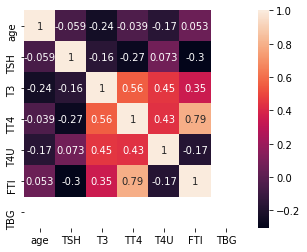

In [282]:
sns.heatmap(data.corr(), square=True, annot=True)

In [283]:
# Cual es el máximo de datos faltantes en un mismo registro?
max(data.isnull().sum(axis=1))

7

In [284]:
#Cuantos datos faltantes hay por cada atributo?
data.isnull().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
Diagnostico   

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


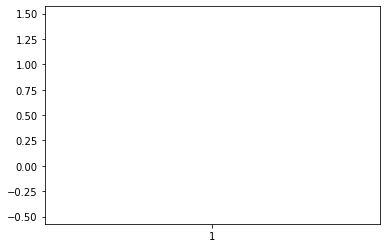

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


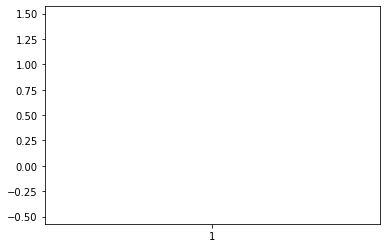

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


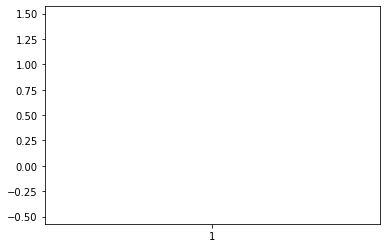

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


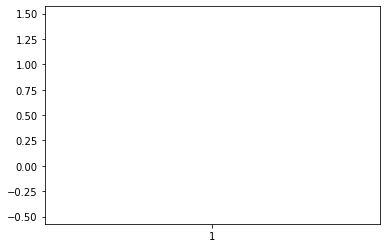

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


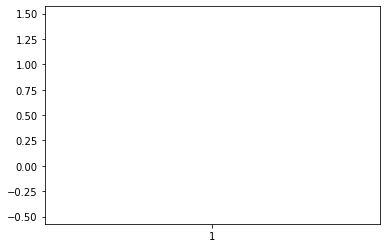

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


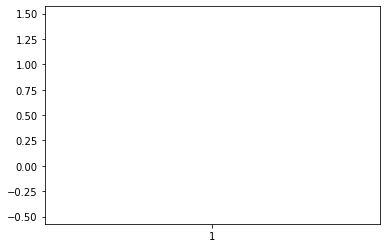

/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/home/katherine/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


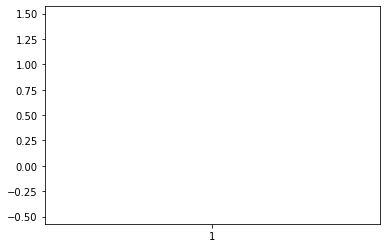

In [285]:
#En qué atributos hay datos atípicos?
plt.boxplot(data['age'])
plt.show()
plt.boxplot(data['TSH'])
plt.show()
plt.boxplot(data['T3'])
plt.show()
plt.boxplot(data['TT4'])
plt.show()
plt.boxplot(data['T4U'])
plt.show()
plt.boxplot(data['FTI'])
plt.show()
plt.boxplot(data['TBG'])
plt.show()

negative               3648
underreplacement         52
replacement therapy      38
overreplacement          34
Name: Diagnostico, dtype: int64


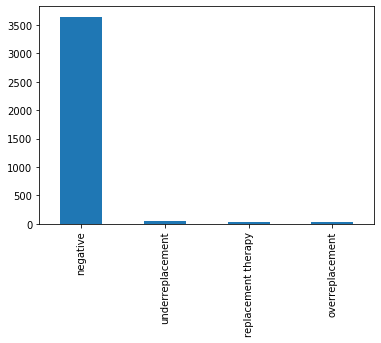

In [286]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
clasificar = data['Diagnostico'].value_counts()
print(clasificar)
clasificar.plot(kind='bar');

# Análisis de los Resultados

Escribir aquí las conclusiones obtenidas del análisis del conjunto de datos.


-    El conjunto es viable?
    
    El conjunto de datos presenta distribuciones convenientes que permiten clasificarlos en las
    4 clases deseadas, por lo tanto el conjunto permitirá obtener información valiosa.
    
    
-   Cuáles son las dificultades más significativas que tiene el conjunto de datos?

    - Hay una cantidad significativa de datos númericos faltantes(incluso hay una columna completa que hace falta)                     razón por lo cual no se pueden hacer los diagramas de cajas para análizar los datos atípicos.
    
    - Hay una mayor cantidad de registros que se clasifican como "negative", por lo que se necesita un balance,   pues  mientras la cantidad de registros que permiten llegar a la anterior clasificación son 3648, los registros
que permiten llegar a las 3 clasificaciones restantes son 124. 
    
    - La matriz de correlación permite identificar atributos muy parecidos,FTI y TT4 presentan un valor de
    correlación muy alto, pues es de 0.79.
    
    
-   Es necesario eliminar atributos?

    Si, hay un atributo que no presenta ningún valor, por lo que pienso que es necesario eliminarlo,pues no 
    aporta en absoluto.
    

-   Es necesario eliminar registros?
    
    No es necesario pero pienso que es conveniente hacerlo, hay registros que pueden tener hasta 7 atributos
    sin valor, por lo que llenarlos con la moda realmente no solucionaría el problema, entonces creo correcto
    eliminar aquellos que presenten una cantidad considerable de atributos vacíos.
    
    
-   Se van a reemplazar los valores nulos por algún valor?
    
    Si, aquellos registros que haya considerado no eliminar porque no presentan muchos atributos vacíos, 
    entonces se llenarán con lo moda.
    
    
-   Cómo se van a manejar los datos atípicos?
    
    Como dije antes, existen una cantidad considerable de datos númericos faltantes por lo que análizar los datos
    atípicos no se pudo realizar, sin embargo la idea es no eliminarlos hasta que los pueda probar con los datos
    de entrenamiento ya que pueden resultar bastante útiles, pero si al final sucede lo contrario, se eliminarán.
    
    
-   Es necesario normalizar los valores de los atributos?

    Si, debido a que tengo muchos datos categóricos que al convertirlos a númericos podría mal interpretar la 
    información con los demás datos, por ello pienso que es conveniente. De esta manera fijaría un rango mucho
    más manejable.

    
-   Están los datos desbalanceados?

    Si, existe una mayor cantidad de datos que se agrupan en una clase, mientras que las demás clases tienen unos
    pocos registros, por lo que es conveniente ajustarlos para balancearlos.


    


# SEGUNDA PARTE

In [287]:
#Aplicar el plan de ajuste
#Eliminar el atributo TBG que no contiene ningún valor.

del data['TBG']
del data['TBG measured']
data


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,referral source,Diagnostico
0,41.0,F,f,f,f,f,f,f,f,f,...,t,2.5,t,125.0,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,2.0,t,102.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,f,NaN,t,109.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,1.9,t,175.0,f,NaN,f,NaN,other,replacement therapy
4,70.0,F,f,f,f,f,f,f,f,f,...,t,1.2,t,61.0,t,0.87,t,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
968,68.0,F,f,f,f,f,f,f,f,f,...,t,2.1,t,124.0,t,1.08,t,114.0,SVI,negative
969,74.0,F,f,f,f,f,f,f,f,f,...,t,1.8,t,112.0,t,1.07,t,105.0,other,negative
970,72.0,M,f,f,f,f,f,f,f,f,...,t,2.0,t,82.0,t,0.94,t,87.0,SVI,negative


In [288]:
# Eliminar el atributo TT4 ya que presenta un alto valor de correlación con el atributo FTI.
del data['TT4']
del data['TT4 measured']
data


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH measured,TSH,T3 measured,T3,T4U measured,T4U,FTI measured,FTI,referral source,Diagnostico
0,41.0,F,f,f,f,f,f,f,f,f,...,t,1.30,t,2.5,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,4.10,t,2.0,f,NaN,f,NaN,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,0.98,f,NaN,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,0.16,t,1.9,f,NaN,f,NaN,other,replacement therapy
4,70.0,F,f,f,f,f,f,f,f,f,...,t,0.72,t,1.2,t,0.87,t,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,30.0,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,negative
968,68.0,F,f,f,f,f,f,f,f,f,...,t,1.00,t,2.1,t,1.08,t,114.0,SVI,negative
969,74.0,F,f,f,f,f,f,f,f,f,...,t,5.10,t,1.8,t,1.07,t,105.0,other,negative
970,72.0,M,f,f,f,f,f,f,f,f,...,t,0.70,t,2.0,t,0.94,t,87.0,SVI,negative


In [289]:
#Eliminar los registros que tengan más de tres atributos faltantes.

data.dropna(axis = 0, thresh = 23)
data.shape

(3772, 26)

In [290]:
#Ver cuantos datos aún quedan por llenar
data.isnull().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
referral source                0
Diagnostico                    0
dtype: int64

In [291]:
#Para los atributos age,sex reemplazar los datos faltantes por la moda.
#Para TSH,T3,T4U y FTI, reemplazar los datos faltantes por 0.

data.age.fillna(data.age.mode()[0], inplace=True)
data.sex.fillna(data.sex.mode()[0], inplace=True)
data['TSH'].fillna(0, inplace = True)
data['T3'].fillna(0, inplace = True)
data['T4U'].fillna(0, inplace = True)
data['FTI'].fillna(0, inplace = True)
data


,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH measured,TSH,T3 measured,T3,T4U measured,T4U,FTI measured,FTI,referral source,Diagnostico
0,41.0,F,f,f,f,f,f,f,f,f,...,t,1.30,t,2.5,t,1.14,t,109.0,SVHC,negative
1,23.0,F,f,f,f,f,f,f,f,f,...,t,4.10,t,2.0,f,0.00,f,0.0,other,negative
2,46.0,M,f,f,f,f,f,f,f,f,...,t,0.98,f,0.0,t,0.91,t,120.0,other,negative
3,70.0,F,t,f,f,f,f,f,f,f,...,t,0.16,t,1.9,f,0.00,f,0.0,other,replacement therapy
4,70.0,F,f,f,f,f,f,f,f,f,...,t,0.72,t,1.2,t,0.87,t,70.0,SVI,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,30.0,F,f,f,f,f,f,f,f,f,...,f,0.00,f,0.0,f,0.00,f,0.0,other,negative
968,68.0,F,f,f,f,f,f,f,f,f,...,t,1.00,t,2.1,t,1.08,t,114.0,SVI,negative
969,74.0,F,f,f,f,f,f,f,f,f,...,t,5.10,t,1.8,t,1.07,t,105.0,other,negative
970,72.0,M,f,f,f,f,f,f,f,f,...,t,0.70,t,2.0,t,0.94,t,87.0,SVI,negative


In [292]:
#Verificar que no hayan datos faltantes
data.isnull().sum()


age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
referral source              0
Diagnostico                  0
dtype: int64

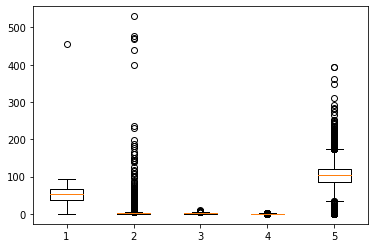

In [293]:
#Observacion: Ahora ya se pueden realizar los diagramas de cajas porque no hay datos númericos faltantes.

#Diagrama de cajas y bigotes para atributos numéricos

plt.boxplot((data['age'],data['TSH'],data['T3'],data['T4U'], data['FTI']))
plt.show()

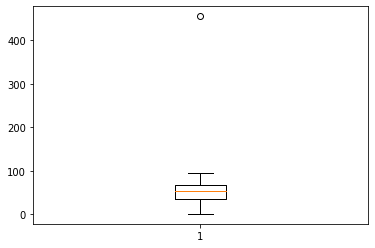

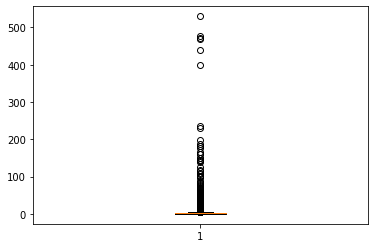

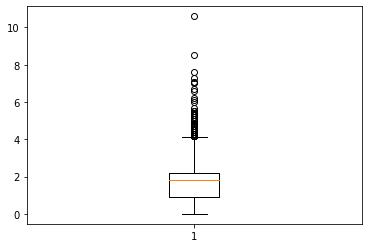

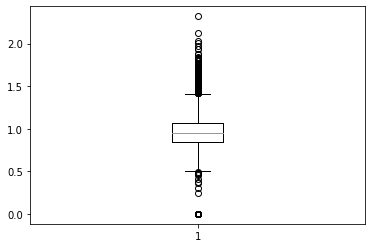

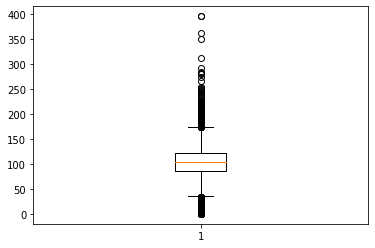

In [294]:
#En qué atributos hay datos atípicos? 
plt.boxplot(data['age'])
plt.show()
plt.boxplot(data['TSH'])
plt.show()
plt.boxplot(data['T3'])
plt.show()
plt.boxplot(data['T4U'])
plt.show()
plt.boxplot(data['FTI'])
plt.show()


#Análisis---> Hay muchos datos atípicos por lo que eliminarlos no es una solución, lo mejor es esperar y
            #entrenarlos para ver que resultado se puede obtener y entonces tomar una decisión.


In [295]:
data.dtypes

age                          float64
sex                           object
on thyroxine                  object
query on thyroxine            object
on antithyroid medication     object
sick                          object
pregnant                      object
thyroid surgery               object
I131 treatment                object
query hypothyroid             object
query hyperthyroid            object
lithium                       object
goitre                        object
tumor                         object
hypopituitary                 object
psych                         object
TSH measured                  object
TSH                          float64
T3 measured                   object
T3                           float64
T4U measured                  object
T4U                          float64
FTI measured                  object
FTI                          float64
referral source               object
Diagnostico                   object
dtype: object

In [296]:
#Transformar los atributos categóricos a datos numéricos.

labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
data['sex'] = labelencoder.fit_transform(data['sex'])
data['on thyroxine'] = labelencoder.fit_transform(data['on thyroxine'])
data['query on thyroxine'] = labelencoder.fit_transform(data['query on thyroxine'])
data['on antithyroid medication'] = labelencoder.fit_transform(data['on antithyroid medication'])
data['sick'] = labelencoder.fit_transform(data['sick'])
data['pregnant'] = labelencoder.fit_transform(data['pregnant'])
data['thyroid surgery'] = labelencoder.fit_transform(data['thyroid surgery'])
data['I131 treatment'] = labelencoder.fit_transform(data['I131 treatment'])
data['query hypothyroid'] = labelencoder.fit_transform(data['query hypothyroid'])
data['query hyperthyroid'] = labelencoder.fit_transform(data['query hyperthyroid'])
data['lithium'] = labelencoder.fit_transform(data['lithium'])
data['goitre'] = labelencoder.fit_transform(data['goitre'])
data['tumor'] = labelencoder.fit_transform(data['tumor'])
data['hypopituitary'] = labelencoder.fit_transform(data['hypopituitary'])
data['psych'] = labelencoder.fit_transform(data['psych'])
data['TSH measured'] = labelencoder.fit_transform(data['TSH measured'])
data['T3 measured'] = labelencoder.fit_transform(data['T3 measured'])
data['T4U measured'] = labelencoder.fit_transform(data['T4U measured'])
data['FTI measured'] = labelencoder.fit_transform(data['FTI measured'])
data['referral source'] = labelencoder.fit_transform(data['referral source'])
data['Diagnostico'] = labelencoder.fit_transform(data['Diagnostico'])
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH measured,TSH,T3 measured,T3,T4U measured,T4U,FTI measured,FTI,referral source,Diagnostico
0,41.0,0,0,0,0,0,0,0,0,0,...,1,1.30,1,2.5,1,1.14,1,109.0,1,0
1,23.0,0,0,0,0,0,0,0,0,0,...,1,4.10,1,2.0,0,0.00,0,0.0,4,0
2,46.0,1,0,0,0,0,0,0,0,0,...,1,0.98,0,0.0,1,0.91,1,120.0,4,0
3,70.0,0,1,0,0,0,0,0,0,0,...,1,0.16,1,1.9,0,0.00,0,0.0,4,2
4,70.0,0,0,0,0,0,0,0,0,0,...,1,0.72,1,1.2,1,0.87,1,70.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,30.0,0,0,0,0,0,0,0,0,0,...,0,0.00,0,0.0,0,0.00,0,0.0,4,0
968,68.0,0,0,0,0,0,0,0,0,0,...,1,1.00,1,2.1,1,1.08,1,114.0,3,0
969,74.0,0,0,0,0,0,0,0,0,0,...,1,5.10,1,1.8,1,1.07,1,105.0,4,0
970,72.0,1,0,0,0,0,0,0,0,0,...,1,0.70,1,2.0,1,0.94,1,87.0,3,0


In [297]:
#Volver a calcular la correlación entre los atributos de entrada para definir si se debe eliminar algún otro atributo.

#matriz de correlación
data.drop('Diagnostico', axis=1).corr()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,psych,TSH measured,TSH,T3 measured,T3,T4U measured,T4U,FTI measured,FTI,referral source
age,1.000000,-0.000218,0.014819,-0.017881,-0.063891,0.079447,-0.113530,-0.029513,0.053464,0.039537,...,-0.100136,0.105161,-0.049256,0.073158,-0.090585,0.085392,-0.009593,0.084565,0.095977,0.094025
sex,-0.000218,1.000000,-0.095709,0.044712,-0.027278,0.007438,-0.078665,-0.034543,-0.022612,-0.042687,...,0.099896,0.036355,-0.031191,0.071355,0.009558,0.051662,-0.071946,0.052532,0.009669,-0.100458
on thyroxine,0.014819,-0.095709,1.000000,0.005995,-0.002201,-0.042053,0.010152,0.037583,0.063373,0.094412,...,-0.073571,0.041818,0.019810,-0.145061,-0.102925,0.038852,0.057359,0.038285,0.154968,0.162139
query on thyroxine,-0.017881,0.044712,0.005995,1.000000,-0.012446,0.012594,0.045247,0.005858,-0.014610,-0.029808,...,-0.026247,-0.117891,-0.017067,-0.033409,-0.029062,0.031550,0.027126,0.031420,0.020495,0.044642
on antithyroid medication,-0.063891,-0.027278,-0.002201,-0.012446,1.000000,-0.021624,0.072050,-0.012819,0.006589,-0.017264,...,-0.024318,0.001736,-0.010533,0.010950,0.061411,-0.029532,0.006379,-0.029788,-0.033087,0.025122
sick,0.079447,0.007438,-0.042053,0.012594,-0.021624,1.000000,-0.024040,-0.000762,-0.025384,0.027718,...,-0.032883,0.015588,-0.021043,0.006695,-0.046516,0.009399,-0.012410,0.009068,-0.007876,-0.005113
pregnant,-0.113530,-0.078665,0.010152,0.045247,0.072050,-0.024040,1.000000,-0.014251,-0.015048,-0.021364,...,-0.016577,0.001401,-0.019561,0.026865,0.141787,0.032942,0.203045,0.032808,0.012515,-0.133687
thyroid surgery,-0.029513,-0.034543,0.037583,0.005858,-0.012819,-0.000762,-0.014251,1.000000,0.003104,-0.012026,...,-0.027034,0.039310,0.028721,-0.023453,-0.033597,0.010672,0.023694,0.010488,-0.014117,0.039585
I131 treatment,0.053464,-0.022612,0.063373,-0.014610,0.006589,-0.025384,-0.015048,0.003104,1.000000,0.047296,...,-0.028546,0.041509,-0.001429,0.000150,0.008226,0.028540,0.029247,0.028385,0.009207,0.083184
query hypothyroid,0.039537,-0.042687,0.094412,-0.029808,-0.017264,0.027718,-0.021364,-0.012026,0.047296,1.000000,...,-0.012320,0.055090,0.029491,-0.063547,-0.078966,0.014517,0.019606,0.014100,-0.003200,0.042891


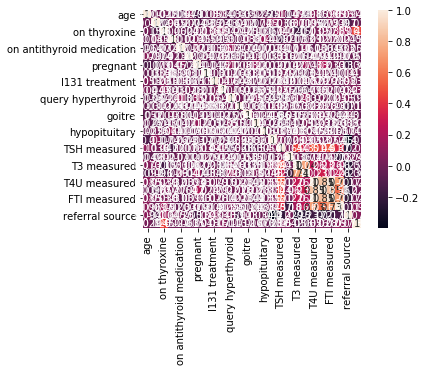

In [298]:
sns.heatmap(data.corr(), square=True, annot=True)

In [299]:
#Verificar la matriz de correlación 

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                print('Las columnas que presentan una alta correlación son:', corr_matrix.columns[i], corr_matrix.columns[j])
    return dataset

data = correlation(data,0.90)



Las columnas que presentan una alta correlación son: FTI measured T4U measured


In [300]:
#Normalizar los valores de los atributos age, TSH, T3,T4U y FTI.

data['age'] = preprocessing.scale(data['age'])
data['TSH'] = preprocessing.scale(data['TSH'])
data['T3'] = preprocessing.scale(data['T3'])
data['T4U'] = preprocessing.scale(data['T4U'])
data['FTI'] = preprocessing.scale(data['FTI'])
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TSH measured,TSH,T3 measured,T3,T4U measured,T4U,FTI measured,FTI,referral source,Diagnostico
0,-0.534752,0,0,0,0,0,0,0,0,0,...,1,-0.140943,1,0.817848,1,0.697672,1,0.213911,1,0
1,-1.431167,0,0,0,0,0,0,0,0,0,...,1,-0.020960,1,0.361965,0,-2.521241,0,-2.163908,4,0
2,-0.285748,1,0,0,0,0,0,0,0,0,...,1,-0.154655,0,-1.461567,1,0.048242,1,0.453874,4,0
3,0.909473,0,1,0,0,0,0,0,0,0,...,1,-0.189793,1,0.270789,0,-2.521241,0,-2.163908,4,2
4,0.909473,0,0,0,0,0,0,0,0,0,...,1,-0.165796,1,-0.367448,1,-0.064702,1,-0.636868,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,-1.082561,0,0,0,0,0,0,0,0,0,...,0,-0.196649,0,-1.461567,0,-2.521241,0,-2.163908,4,0
968,0.809871,0,0,0,0,0,0,0,0,0,...,1,-0.153798,1,0.453142,1,0.528256,1,0.322985,3,0
969,1.108676,0,0,0,0,0,0,0,0,0,...,1,0.021890,1,0.179612,1,0.500020,1,0.126652,4,0
970,1.009074,1,0,0,0,0,0,0,0,0,...,1,-0.166653,1,0.361965,1,0.132951,1,-0.266016,3,0


In [301]:
#BALANCEO
max_size = 1500
lst = [data]

for class_index, group in data.groupby('Diagnostico'):
    if len(group)!= 3648:
        lst.append(group.sample(max_size - len(group),replace=True))
    
dataBal = pd.concat(lst)

# Preparación de conjunto alterno con balanceo entre clases 60-40
g = dataBal.groupby('Diagnostico')
dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#dataBal

clasificar = dataBal['Diagnostico'].value_counts()
print(clasificar)

3    1500
2    1500
1    1500
0    1500
Name: Diagnostico, dtype: int64


3    1500
2    1500
1    1500
0    1500
Name: Diagnostico, dtype: int64


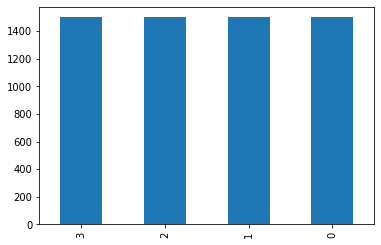

In [302]:
#Cuantos registros hay por cada clase? es decir, por cada valor del atributo de salida?
clasificar = dataBal['Diagnostico'].value_counts()
print(clasificar)
clasificar.plot(kind='bar');



# TERCERA PARTE


In [303]:
#Separar el conjunto de datos en conjunto de entrenamiento y de prueba (**)

y = dataBal.Diagnostico
X_train, X_test, y_train, y_test = train_test_split(dataBal, y, test_size=0.30)
del X_train['Diagnostico']
X_train
del X_test['Diagnostico']
X_test
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(4200, 25) (4200,)
(1800, 25) (1800,)


# CUARTA PARTE

valores: [[391   3  12  25]
 [  0 361  98   0]
 [  0  84 366   0]
 [  0   0   5 455]]

Precisión:  0.8773984157577905
Recall:  0.8738888888888889
F1score:  0.8747428816144446


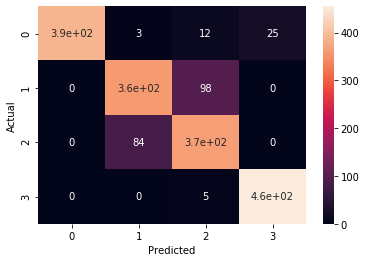

In [304]:
#Clasificador por regresión logística

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
#del X_train['Diagnostico']
#del X_test['Diagnostico']
logisticRegr.fit(X_train, y_train)

predictions = logisticRegr.predict(X_test)


# Matriz de confusión
data1 = {'y_Actual': y_test, 'y_Predictions': predictions}
df1 = pd.DataFrame(data1, columns=['y_Actual','y_Predictions'])
confusion_matrix1 = pd.crosstab(df1['y_Actual'], df1['y_Predictions'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix1, annot=True)

valores = confusion_matrix(y_test, predictions)
print('valores:', valores)
print()

#Métricas de desempeño
print("Precisión: ", precision_score(y_test,predictions,average = 'weighted'))
print("Recall: ", recall_score(y_test,predictions,average = 'weighted'))
print("F1score: ", f1_score(y_test,predictions,average = 'weighted'))




valores: [[400   5   4  22]
 [  0 459   0   0]
 [  0   0 450   0]
 [  0   0   0 460]]

Precisión:  0.983385150543715
Recall:  0.9827777777777778
F1score:  0.9826117075287958


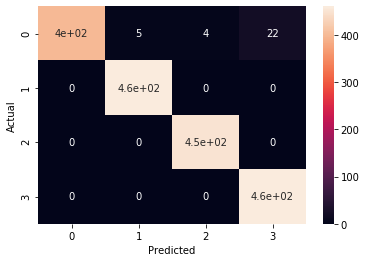

In [305]:
# K-vecinos más cercanos (k=5)

knn = KNeighborsClassifier(5)

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

# Matriz de confusión
data2 = {'y_Actual': y_test, 'y_Predictions': pred}
df2 = pd.DataFrame(data2, columns=['y_Actual','y_Predictions'])
confusion_matrix2 = pd.crosstab(df2['y_Actual'], df2['y_Predictions'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix2, annot=True)

valores2 = confusion_matrix(y_test, pred)
print('valores:', valores2)
print()

#Métricas de desempeño
print("Precisión: ", precision_score(y_test,pred,average = 'weighted'))
print("Recall: ", recall_score(y_test,pred,average = 'weighted'))
print("F1score: ", f1_score(y_test,pred,average = 'weighted'))


#print(confusion_matrix(y_test, pred))
#print(classification_report(y_test, pred))


valores: [[390   2  12  27]
 [  0 348 111   0]
 [  9  98 343   0]
 [  0   0  19 441]]

Precisión:  0.8497398886043419
Recall:  0.8455555555555555
F1score:  0.847008530785751


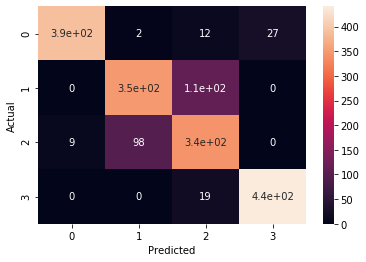

In [306]:
#Análisis discriminante lineal

lda = LinearDiscriminantAnalysis()
lda1 = lda.fit(X_train, y_train)

predic = lda1.predict(X_test)

# Matriz de confusión
data3 = {'y_Actual': y_test, 'y_Predictions': predic}
df3 = pd.DataFrame(data3, columns=['y_Actual','y_Predictions'])
confusion_matrix3 = pd.crosstab(df3['y_Actual'], df3['y_Predictions'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix3, annot=True)

valores3 = confusion_matrix(y_test, predic)
print('valores:', valores3)
print()

#Métricas de desempeño
print("Precisión: ", precision_score(y_test,predic,average = 'weighted'))
print("Recall: ", recall_score(y_test,predic,average = 'weighted'))
print("F1score: ", f1_score(y_test,predic,average = 'weighted'))



/home/katherine/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


valores: [[402   0   7  22]
 [ 93   0 229 137]
 [ 48   0 250 152]
 [ 83   0   0 377]]

Precisión:  0.42240099599851644
Recall:  0.5716666666666667
F1score:  0.4835262923511995


/home/katherine/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


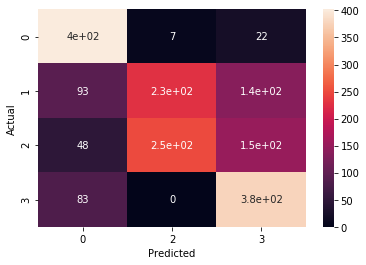

In [313]:
#Análisis discriminante cuadrático

qda = QuadraticDiscriminantAnalysis()
qda = qda.fit(X_train, y_train)

p = qda.predict(X_test)

# Matriz de confusión
data33 = {'y_Actual': y_test, 'y_Predictions': p}
df33 = pd.DataFrame(data33, columns=['y_Actual','y_Predictions'])
confusion_matrix33 = pd.crosstab(df33['y_Actual'], df33['y_Predictions'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix33, annot=True)

valores33 = confusion_matrix(y_test, p)
print('valores:', valores33)
print()

#Métricas de desempeño
print("Precisión: ", precision_score(y_test,p,average = 'weighted'))
print("Recall: ", recall_score(y_test,p,average = 'weighted'))
print("F1score: ", f1_score(y_test,p,average = 'weighted'))

# Regresion lineal

(4200, 25) (4200,)
(1800, 25) (1800,)


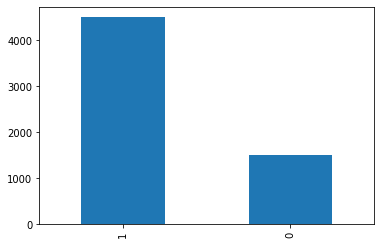

In [308]:
#PRIMER CONJUNTO DE DATOS
dataNuevo = dataBal.copy()
#0 contra el resto
dataNuevo.replace({1:1,2:1,3:1}, inplace = True)

clasificar14 = dataNuevo['Diagnostico'].value_counts()
#print(clasificar14)
clasificar14.plot(kind='bar');

#print(dataNuevo['Diagnostico'])

m = dataNuevo.Diagnostico
m_train, m_test, r_train, r_test = train_test_split(dataNuevo, m, test_size=0.30)
del m_train['Diagnostico']
m_train
del m_test['Diagnostico']
m_test
print (m_train.shape, r_train.shape)
print (m_test.shape, r_test.shape)

#Creamos el objeto de Regresión Linear

regresionLineal = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regresionLineal.fit(m_train, r_train)

# Hacemos las predicciones 
prediccionU = regresionLineal.predict(m_test)
prediccionFinal = []


fpr, tpr, thresholds = roc_curve(r_test, prediccionU)
optimal_idx = np.argmax(tpr - fpr)
umbral = thresholds[optimal_idx]


for i in range(len(prediccionU)):
    if(prediccionU[i] <= umbral):
        prediccionFinal.append(0)
    
    else:
        prediccionFinal.append(4)

#print(prediccionFinal)

(4200, 25) (4200,)
(1800, 25) (1800,)


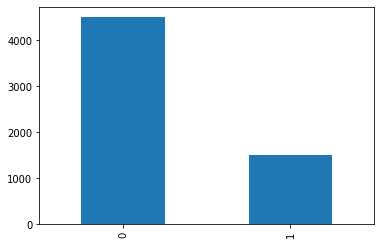

In [309]:
#SEGUNDO CONJUNTO DE DATOS
nuevo = dataBal.copy()
#1 contra el resto
nuevo.replace({0:0,2:0,3:0}, inplace = True)


clasificar5 = nuevo['Diagnostico'].value_counts()
clasificar5.plot(kind='bar');

d = nuevo.Diagnostico
m1_train, m1_test, r1_train, r1_test = train_test_split(nuevo, d, test_size=0.30)
del m1_train['Diagnostico']
m1_train
del m1_test['Diagnostico']
m1_test
print (m1_train.shape, r1_train.shape)
print (m1_test.shape, r1_test.shape)

#Creamos el objeto de Regresión Linear
regresionLineal1 = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regresionLineal1.fit(m1_train, r1_train)

# Hacemos las predicciones 
prediccionU1 = regresionLineal1.predict(m1_test)
prediccionFinal1 = []


fpr, tpr, thresholds = roc_curve(r1_test, prediccionU1)
optimal_idx = np.argmax(tpr - fpr)
umbral1 = thresholds[optimal_idx]


for i in range(len(prediccionU1)):
    if(prediccionU1[i] <= umbral1):
        prediccionFinal1.append(4)
    
    else:
        prediccionFinal1.append(1)

#print(prediccionFinal)




(4200, 25) (4200,)
(1800, 25) (1800,)


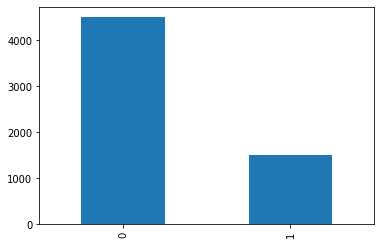

In [310]:
#TERCER CONJUNTO DE DATOS
new = dataBal.copy()
#2 contra el resto
new.replace({0:0,1:0,3:0,2:1}, inplace = True)

clasificar6 = nuevo['Diagnostico'].value_counts()
clasificar6.plot(kind='bar');


a = new.Diagnostico
m2_train, m2_test, r2_train, r2_test = train_test_split(new, a, test_size=0.30)
del m2_train['Diagnostico']
m2_train
del m2_test['Diagnostico']
m2_test
print (m2_train.shape, r2_train.shape)
print (m2_test.shape, r2_test.shape)

#Creamos el objeto de Regresión Linear
regresionLineal2 = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regresionLineal2.fit(m2_train, r2_train)

# Hacemos las predicciones 
prediccionU2 = regresionLineal2.predict(m2_test)
prediccionFinal2 = []


fpr, tpr, thresholds = roc_curve(r2_test, prediccionU2)
optimal_idx = np.argmax(tpr - fpr)
umbral2 = thresholds[optimal_idx]


for i in range(len(prediccionU2)):
    if(prediccionU2[i] <= umbral2):
        prediccionFinal2.append(4)
    
    else:
        prediccionFinal2.append(2)

#print(prediccionFinal2)





(4200, 25) (4200,)
(1800, 25) (1800,)


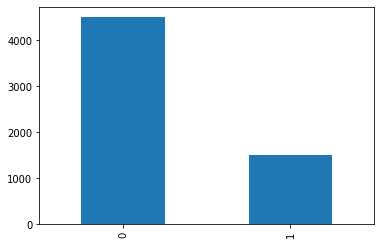

In [311]:
#CUARTO CONJUNTO DE DATOS
n = dataBal.copy()
#3 contra el resto
n.replace({0:0,1:0,2:0,3:1}, inplace = True)

clasificar7 = n['Diagnostico'].value_counts()
clasificar7.plot(kind='bar');


q = n.Diagnostico
m3_train, m3_test, r3_train, r3_test = train_test_split(n, q, test_size=0.30)
del m3_train['Diagnostico']
m3_train
del m3_test['Diagnostico']
m3_test
print (m3_train.shape, r3_train.shape)
print (m3_test.shape, r3_test.shape)

#Creamos el objeto de Regresión Linear
regresionLineal3 = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regresionLineal3.fit(m3_train, r3_train)

# Hacemos las predicciones 
prediccionU3 = regresionLineal3.predict(m3_test)
prediccionFinal3 = []


fpr, tpr, thresholds = roc_curve(r3_test, prediccionU3)
optimal_idx = np.argmax(tpr - fpr)
umbral3 = thresholds[optimal_idx]


for i in range(len(prediccionU3)):
    if(prediccionU3[i] <= umbral3):
        prediccionFinal3.append(4)
    
    else:
        prediccionFinal3.append(3)



valores: [[166 121 105  39]
 [169 126 126  38]
 [183 117 102  48]
 [167 119 135  39]]

Precisión:  0.23980722930145104
Recall:  0.24055555555555555
F1score:  0.22694913717223836


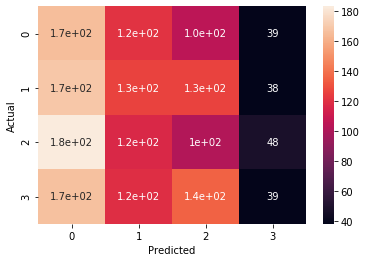

In [312]:
respuesta = [0 for i in range(len(prediccionFinal3))]

for i in range(len(prediccionFinal3)):
    if (prediccionFinal[i] == 0):
        if(prediccionFinal1[i] == 4):
            if(prediccionFinal2[i] == 4):
                if(prediccionFinal3[i] == 4):
                    respuesta[i] = 0
                
                if(prediccionFinal3[i] == 3):
                    respuesta[i] = 0
            
            if(prediccionFinal2[i] == 2):
                respuesta[i] = 0
        
        if(prediccionFinal1[i] == 1):
            respuesta[i] = 0

    if(prediccionFinal[i] == 4):
        if(prediccionFinal1[i] == 4):
            if(prediccionFinal2[i] == 4):
                if(prediccionFinal3[i] == 3):
                    respuesta[i] = 3
                
                if(prediccionFinal3[i] == 4):
                    respuesta[i] = 0
            
            if(prediccionFinal2[i] == 2):
                respuesta[i] = 2
        
        if(prediccionFinal1[i] == 1):
            respuesta[i] = 1

        
# Matriz de confusión
data44 = {'y_Actual': y_test, 'y_Predictions': respuesta}
df44 = pd.DataFrame(data44, columns=['y_Actual','y_Predictions'])
confusion_matrix5 = pd.crosstab(df44['y_Actual'], df44['y_Predictions'], rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix5, annot=True)

valores5 = confusion_matrix(y_test, respuesta)
print('valores:', valores5)
print()

#Métricas de desempeño
print("Precisión: ", precision_score(y_test,respuesta,average = 'weighted'))
print("Recall: ", recall_score(y_test,respuesta,average = 'weighted'))
print("F1score: ", f1_score(y_test,respuesta,average = 'weighted'))
    

    